#### EDA of the Pytorch Pull Request Data between January 2018 and December 2023

Importing necessary libraries

In [5]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

Loading the data


In [8]:
df = pd.read_csv("../data/raw/pytorch_prs_2018_2023.csv")

Coverting data fields

In [9]:
df["created_at"] = pd.to_datetime(df["created_at"])
df["year"] = df["created_at"].dt.year
df["month"] = df["created_at"].dt.month
df["year_month"] = df["created_at"].dt.to_period("M")

C:\Users\20225118\AppData\Local\Temp\ipykernel_1928\823640106.py:4: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["year_month"] = df["created_at"].dt.to_period("M")


Basic Info

In [10]:
print("Shape", df.shape)
print("Columns", df.columns.to_list())
print("Date Range", df["created_at"].min(), "→", df["created_at"].max())
print("\n Missing values \n", df.isnull().sum())

Shape (75414, 16)
Columns ['pr_number', 'title', 'state', 'created_at', 'closed_at', 'merged_at', 'author', 'merged_by', 'assignees', 'reviewers', 'commit_authors', 'comment_authors', 'review_comment_authors', 'year', 'month', 'year_month']
Date Range 2018-01-01 01:46:15+00:00 → 2023-12-30 23:57:26+00:00

 Missing values 
 pr_number                     0
title                         2
state                         0
created_at                    0
closed_at                    24
merged_at                 71525
author                        0
merged_by                 75414
assignees                     0
reviewers                     0
commit_authors                0
comment_authors               0
review_comment_authors        0
year                          0
month                         0
year_month                    0
dtype: int64


PRs Over Time

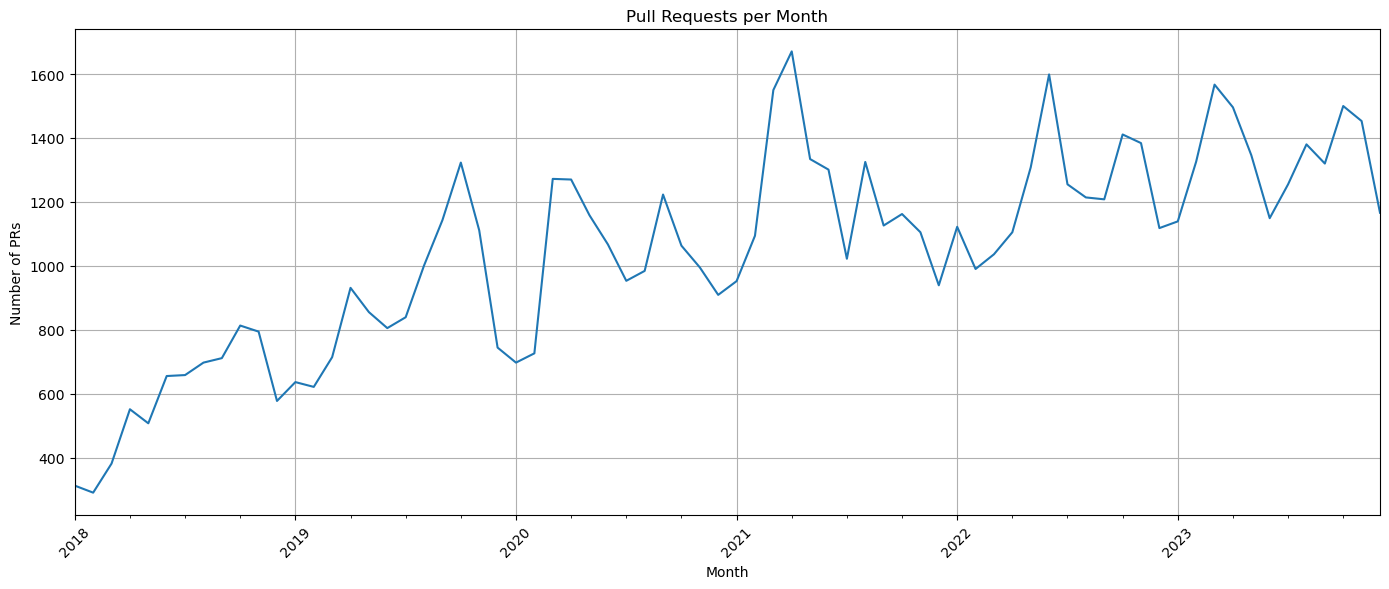

In [11]:
pr_monthly = df.groupby("year_month").size()
plt.figure(figsize=(14, 6))
pr_monthly.plot()
plt.title("Pull Requests per Month")
plt.xlabel("Month")
plt.ylabel("Number of PRs")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

Top Authors

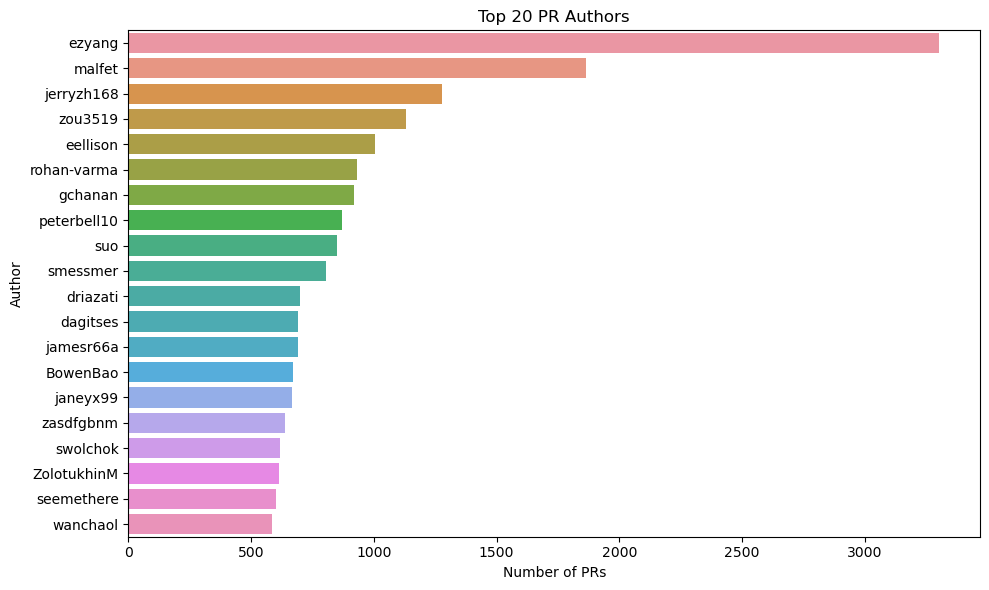

In [12]:
top_authors = df["author"].value_counts().head(20)
plt.figure(figsize=(10, 6))
sns.barplot(y=top_authors.index, x=top_authors.values)
plt.title("Top 20 PR Authors")
plt.xlabel("Number of PRs")
plt.ylabel("Author")
plt.tight_layout()
plt.show()

Merged vs Open vs Closed

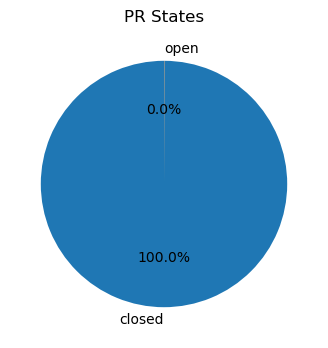

In [13]:
plt.figure(figsize=(6, 4))
df["state"].value_counts().plot.pie(autopct="%1.1f%%", startangle=90)
plt.title("PR States")
plt.ylabel("")
plt.show()

Distribution of Assignees Reviewers

c:\Users\20225118\AppData\Local\anaconda3\envs\Machine_Learning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


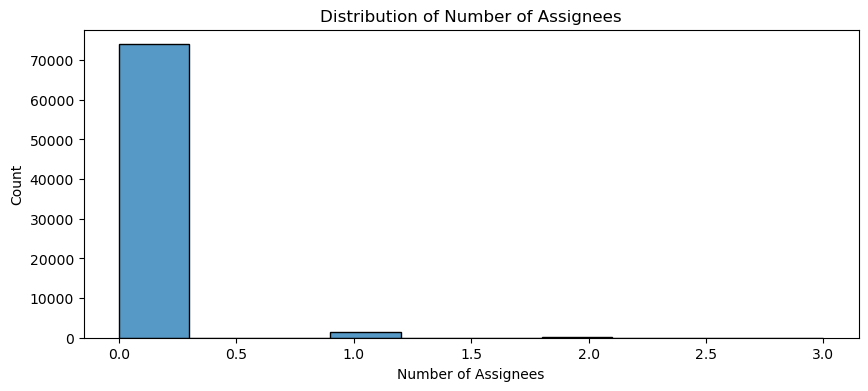

c:\Users\20225118\AppData\Local\anaconda3\envs\Machine_Learning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


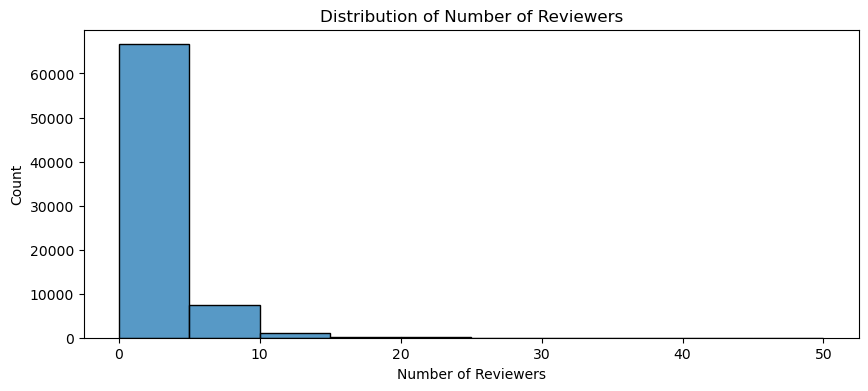

In [18]:
df["num_assignees"] = df["assignees"].apply(lambda x: len(eval(x)) if pd.notnull(x) else 0)
df["num_reviewers"] = df["reviewers"].apply(lambda x: len(eval(x)) if pd.notnull(x) else 0)

plt.figure(figsize=(10, 4))
sns.histplot(df["num_assignees"], bins=10, kde=False)
plt.title("Distribution of Number of Assignees")
plt.xlabel("Number of Assignees")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(10, 4))
sns.histplot(df["num_reviewers"], bins=10, kde=False)
plt.title("Distribution of Number of Reviewers")
plt.xlabel("Number of Reviewers")
plt.ylabel("Count")
plt.show()


Bot Filtering

In [19]:
bot_keywords = ["bot", "github-actions", "automation", "[bot]"]
df["is_bot"] = df["author"].str.lower().apply(lambda x: any(bot in x for bot in bot_keywords))

print(f"Potential bots (author field): {df['is_bot'].sum()}")

Potential bots (author field): 648


Time-Based Splitting

In [ ]:
df_pre = df[df["created_at"] < "2020-01-30"]
df_during = df[(df["created_at"] >= "2020-01-30") & (df["created_at"] < "2023-05-05")]
df_post = df[df["created_at"] >= "2023-05-05"]

print(f"Pre-COVID PRs: {len(df_pre)}")
print(f"During-COVID PRs: {len(df_during)}")
print(f"Post-COVID PRs: {len(df_post)}")

Author Activity Distribution

c:\Users\20225118\AppData\Local\anaconda3\envs\Machine_Learning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


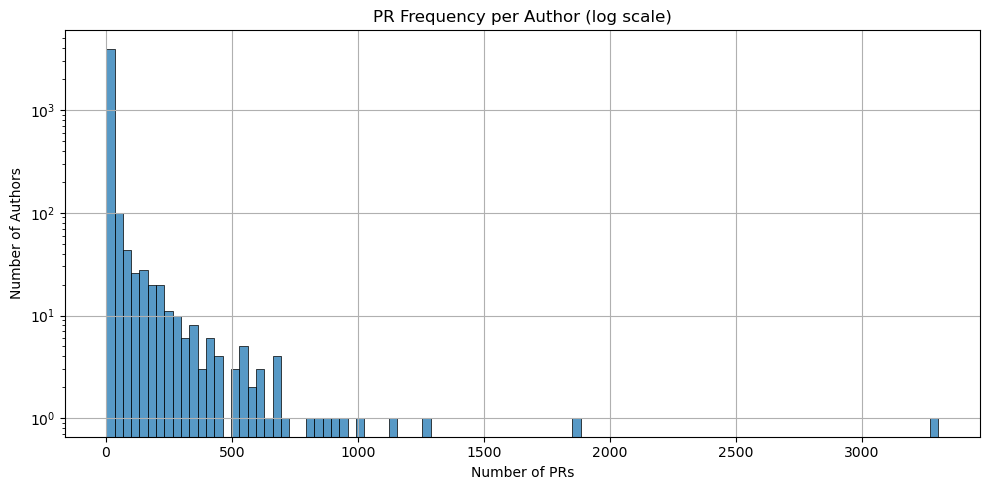

In [21]:
author_freq = df["author"].value_counts()
plt.figure(figsize=(10, 5))
sns.histplot(author_freq, bins=100, log=True)
plt.title("PR Frequency per Author (log scale)")
plt.xlabel("Number of PRs")
plt.ylabel("Number of Authors")
plt.grid(True)
plt.tight_layout()
plt.show()

PR Size / Collaboration Intensity

c:\Users\20225118\AppData\Local\anaconda3\envs\Machine_Learning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


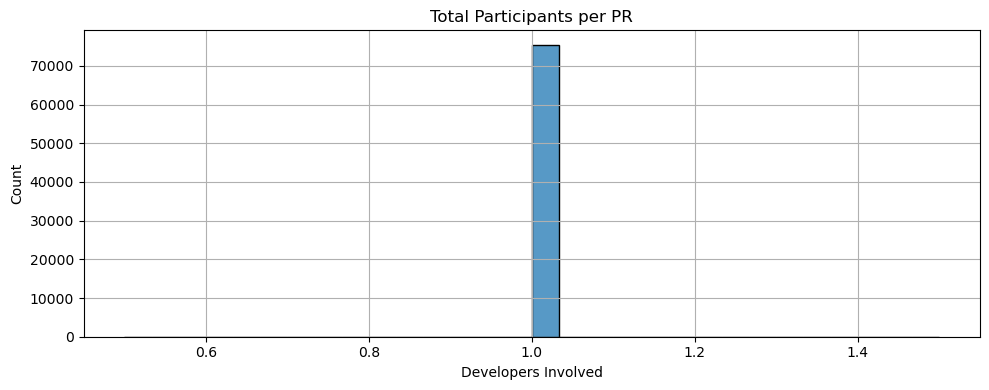

In [22]:
def safe_count(val):
    try:
        return len(ast.literal_eval(val))
    except:
        return 0

df["total_participants"] = (
    1 +  # PR author
    df["commit_authors"].apply(safe_count) +
    df["comment_authors"].apply(safe_count) +
    df["review_comment_authors"].apply(safe_count)
)

plt.figure(figsize=(10, 4))
sns.histplot(df["total_participants"], bins=30, kde=False)
plt.title("Total Participants per PR")
plt.xlabel("Developers Involved")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()